In [1]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.set_random_seed(7)


In [27]:
def MinMaxScaler(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)
#input data to be normalized
#Parameters
#-------------
#data: numpy.ndarray
#      shape: [Batch size, dimension]

#Returns
#--------------
#data: numpy.ndarray
#      normalized data
#      shape [Batch size, dimension]

In [34]:
#load data
#year(3), month(4), day(5), day of week(6)
xy=np.genfromtxt('./data/201701-201701빵판매량.csv', delimiter=',')[2779:,[3,4,5,6,1]]

#train parameters
seq_length=7
data_dim=
hidden_dim=10
output_dim=1
learning_rate=0.01
iteration=500

In [ ]:
먼저 data를 load하는데, 전체 데이터 중 사용할 feature와 사용하지 않을 feature는 미리 결정해두고

사용할 것만 불러온다.
사용한 데이터의 경우 빵종류가 8가지여서 8번빵에 대해서만 했다. 따라서 [2779:,~]를 이용했다.
그리고, 그 옆 [~:~, [3,4,5,6,1]]부분은 사용하는 feature와 관련된 자료다.
열 3은 year, 4는 month, 5는 day, 6은 day of week다. 

그리고, 마지막 1열이 판매량이다.
중요한 것은 김성훈교수님 코드에서 알 수 있듯이 과거 판매량도 X행렬에 포함된다는 것이다.

즉, 내일 판매량을 예측하는 데 지금까지 지난 7일간 축적된 모든 data와 내일의 년,월,일,요일이 필요하다.

다음 김성훈교수님의 코드를 보면서 확인해보자.
# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

나와 다른 것은 일단 reverse order 코드가 있다는 것이고(그만큼 시계열에서는 sequence와 방향이 중요한듯)
그리고, 두번째 줄은 정규화 과정이다. 
여기서 궁금했던 점 하나는 교수님은 feature를 모두 같은 성격의 open, high, low, volume,close 를 사용했다.
(물론 다른 4개의 feature와 volume은 좀 다른 점이 있는 듯 하다.)
그래서 한꺼번에 xy=MinMaxScaler(xy)와 같이 정규화시키는 과정이 정당화되지만,

나의 자료같은 경우 년, 월, 일, 요일, 판매량
이 5개는 모두 단위도 다르고 척도도 다르고 성격도 조금 다른데, 한꺼번에 normalization을 시켜도 될까?
그리고, 자료의 성격이 다른 것도 큰 문제였다. 그래서 datatype에 대해 조사해보았다.

"데이터의 유형과 유형의 성격을 정확히 이해하는 것은 최초 데이터 수집 시 어떤 유형으로 데이터를 수집하는 게 적절할지 결정하는 일에서부터 이후 분석이나 시각화 과정에서 데이터 유형에 따라 할 수 있는/없는 일들이 결정되므로 중요하다."

1. nominal data(명목자료)
    순서를 매길 수 없고 그냥 셀수 있음.
    평균이 의미 없음
    categorical data라고 부르기도 함
2. ordinal data(순서자료)
    데이터가 속하는 category들에 순서가 있는 경우
    scale있는 데이터
3. interval data(구간자료)   
    numeric value를 가지므로 다양한 연산수행가능
    절대적 원점이 없다.
4.  ratio data(비율자료)
    
    


In [35]:
xy[1]

array([  2.01600000e+03,   1.00000000e+00,   2.00000000e+00,
         7.00000000e+00,   1.00000000e+00,   4.10000000e+01])

In [31]:
#train parameters
seq_length=7
data_dim=6
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500

In [32]:
xy=MinMaxScaler(xy[1])

In [33]:
x=xy[::]

In [21]:
x

array([[  1.68567179e-02,   9.99504214e-01,   4.95785821e-04,
          4.95785821e-04,   2.97471492e-03,   4.95785821e-04],
       [  2.03272186e-02,   9.99504214e-01,   4.95785821e-04,
          9.91571641e-04,   3.47050074e-03,   4.95785821e-04],
       [  2.67724343e-02,   9.99504214e-01,   4.95785821e-04,
          1.48735746e-03,   4.95785821e-04,   9.91571641e-04],
       ..., 
       [  0.00000000e+00,   1.00000000e+00,   4.95785821e-04,
          1.43777888e-02,   4.95785821e-04,   2.87555776e-02],
       [  2.47892910e-03,   1.00000000e+00,   4.95785821e-04,
          1.48735746e-02,   9.91571641e-04,   2.87555776e-02],
       [  1.53693604e-02,   1.00000000e+00,   4.95785821e-04,
          1.53693604e-02,   1.48735746e-03,   2.87555776e-02]])

In [22]:
y=xy[:,[-1]]

In [23]:
y

array([[ 0.00049579],
       [ 0.00049579],
       [ 0.00099157],
       [ 0.00099157],
       [ 0.00099157],
       [ 0.00099157],
       [ 0.00099157],
       [ 0.00099157],
       [ 0.00099157],
       [ 0.00148736],
       [ 0.00148736],
       [ 0.00148736],
       [ 0.00148736],
       [ 0.00148736],
       [ 0.00148736],
       [ 0.00148736],
       [ 0.00198314],
       [ 0.00198314],
       [ 0.00198314],
       [ 0.00198314],
       [ 0.00198314],
       [ 0.00198314],
       [ 0.00198314],
       [ 0.00247893],
       [ 0.00247893],
       [ 0.00247893],
       [ 0.00247893],
       [ 0.00247893],
       [ 0.00247893],
       [ 0.00247893],
       [ 0.00297471],
       [ 0.00297471],
       [ 0.00297471],
       [ 0.00297471],
       [ 0.00297471],
       [ 0.00297471],
       [ 0.00297471],
       [ 0.0034705 ],
       [ 0.0034705 ],
       [ 0.0034705 ],
       [ 0.0034705 ],
       [ 0.0034705 ],
       [ 0.0034705 ],
       [ 0.0034705 ],
       [ 0.00396629],
       [ 0

In [24]:
#build a dataset
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    -y=y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

SyntaxError: can't assign to operator (<ipython-input-24-c3dac8f7194c>, line 6)

In [5]:
x=xy[:,[0]]

In [6]:
y=xy[:,[1]]

In [7]:
y=y.astype(np.float)

In [8]:
y=MinMaxScaler(y)

In [9]:
from datetime import datetime
date_format="%Y-%m-%d"

In [10]:
x1=[]
start=datetime.strptime(x[0][0], date_format)
for i in range(len(x)):
    a=datetime.strptime(x[i][0], date_format)
    diff=a-start
    x1.append(diff.days)

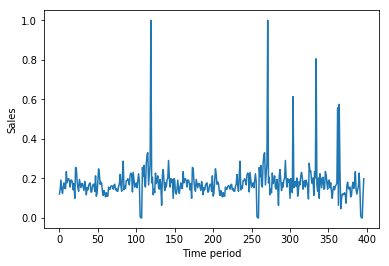

In [11]:
plt.plot(x1,y)
plt.xlabel("Time period")
plt.ylabel("Sales")
plt.show()

In [12]:
plt.plot(x1,y)
p.t.plot
plt.show()

NameError: name 'p' is not defined

In [13]:
dataX=[]
dataY=[]
for i in range(0,len(y)-seq_length):
    _x=x1[i:i+seq_length]
    _y=y[i:i+seq_length]
    if i<2: print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

[0, 1, 2, 3, 4, 5, 6] -> [[ 0.12056738]
 [ 0.14539007]
 [ 0.19148936]
 [ 0.14539007]
 [ 0.12411348]
 [ 0.15602837]
 [ 0.17730496]]
[1, 2, 3, 4, 5, 6, 7] -> [[ 0.14539007]
 [ 0.19148936]
 [ 0.14539007]
 [ 0.12411348]
 [ 0.15602837]
 [ 0.17730496]
 [ 0.14893617]]


In [14]:
dataX

[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8],
 [3, 4, 5, 6, 7, 8, 9],
 [4, 5, 6, 7, 8, 9, 10],
 [5, 6, 7, 8, 9, 10, 11],
 [6, 7, 8, 9, 10, 11, 12],
 [7, 8, 9, 10, 11, 12, 13],
 [8, 9, 10, 11, 12, 13, 14],
 [9, 10, 11, 12, 13, 14, 15],
 [10, 11, 12, 13, 14, 15, 16],
 [11, 12, 13, 14, 15, 16, 17],
 [12, 13, 14, 15, 16, 17, 18],
 [13, 14, 15, 16, 17, 18, 19],
 [14, 15, 16, 17, 18, 19, 20],
 [15, 16, 17, 18, 19, 20, 21],
 [16, 17, 18, 19, 20, 21, 22],
 [17, 18, 19, 20, 21, 22, 23],
 [18, 19, 20, 21, 22, 23, 24],
 [19, 20, 21, 22, 23, 24, 25],
 [20, 21, 22, 23, 24, 25, 26],
 [21, 22, 23, 24, 25, 26, 27],
 [22, 23, 24, 25, 26, 27, 28],
 [23, 24, 25, 26, 27, 28, 29],
 [24, 25, 26, 27, 28, 29, 30],
 [25, 26, 27, 28, 29, 30, 31],
 [26, 27, 28, 29, 30, 31, 32],
 [27, 28, 29, 30, 31, 32, 33],
 [28, 29, 30, 31, 32, 33, 34],
 [29, 30, 31, 32, 33, 34, 35],
 [30, 31, 32, 33, 34, 35, 36],
 [31, 32, 33, 34, 35, 36, 37],
 [32, 33, 34, 35, 36, 37, 38],
 [33, 34, 35, 36, 37, 38, 

In [32]:
len(dataX)

390

In [15]:
train_size=int(len(dataY)*0.7)
test_size= len(dataY)-train_size
trainX, testX=np.array(dataX[0:train_size]), np.array(dataX[train_size: len(dataX)])
trainY, testY=np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [33]:
trainX.shape

(273, 7)

In [16]:
train_size=int(len(dataY)*0.7)
test_size=len(dataY)-train_size
trainX,testX=np.array(dataX[0:train_size]),np.array(dataY[train_size:])
trainY, testY=np.array(dataY[0:train_size]), np.array(dataY[train_size:])

In [17]:
print(trainX[:2])

[[0 1 2 3 4 5 6]
 [1 2 3 4 5 6 7]]


In [18]:
print(trainY[:2])

[[[ 0.12056738]
  [ 0.14539007]
  [ 0.19148936]
  [ 0.14539007]
  [ 0.12411348]
  [ 0.15602837]
  [ 0.17730496]]

 [[ 0.14539007]
  [ 0.19148936]
  [ 0.14539007]
  [ 0.12411348]
  [ 0.15602837]
  [ 0.17730496]
  [ 0.14893617]]]


In [19]:
#input place holder
X=tf.placeholder(tf.float32, [None, seq_length,data_dim]) 

#data dimension은 즉 feature의 개수인 것 같다. 
#ds-y와 같이 feature가 없는 상황에서는 data dimension
Y=tf.placeholder(tf.float32,[None, 1])

In [20]:
trainX.shape

(273, 7)

In [21]:
#build LSTM network
cell=tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [22]:
tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

(<tf.Tensor 'rnn_1/transpose:0' shape=(?, 7, 10) dtype=float32>,
 LSTMStateTuple(c=<tf.Tensor 'rnn_1/while/Exit_2:0' shape=(?, 10) dtype=float32>, h=<tf.Tensor 'rnn_1/while/Exit_3:0' shape=(?, 10) dtype=float32>))

In [25]:
#outputs[:,-1]: all batch of data_dim of last seq_length
Y_pred=tf.contrib.layers.fully_connected(outputs[:,-1], output_dim, activation_fn=None)
#we use the last cell's output
#cost/loss
loss=tf.reduce_sum(tf.square(tf.square(Y_pred-Y)))
#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [43]:
trainY.shape

(273, 7, 1)

In [45]:
testX.shape

(117, 7, 1)

In [46]:

# train Parameters
iterations = 200

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
#         print(sess.run(outputs[:, -1], feed_dict={X: trainX, Y: trainY}))
        
    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    
    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

ValueError: Cannot feed value of shape (273, 7, 1) for Tensor 'Placeholder_3:0', which has shape '(?, 1)'

In [ ]:
Y_pred.shape

In [ ]:
testX.shape

In [ ]:
trainX.shape

In [ ]:
trainY.shape

In [34]:
dataX=array(dataX).reshape(273,7,1)

NameError: name 'array' is not defined

In [35]:
from numpy import array

In [39]:
trainX=array(trainX).reshape(273,7,1)

In [38]:
len(dataX)

390